<h1 style="background-color:Green;font-size:36pt;color:white">Logistic Regression</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [99]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

$$P(Y = 1 | X) = \sigma (\theta^T X) = \frac{e^{\theta^T X}}{1+ e^{\theta^T X}}$$

In this equation,  $\theta^T X$  is the regression result (the sum of the variables weighted by the coefficients), exp is the exponential function and $\sigma (\theta^T X)$  is the sigmoid or logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve).

# About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. 

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

# Downloading Data

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')

# Take a look at the dataset
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Exploring Data

Displaying the datatypes of the columns

In [3]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

We don't have to be changes, everything is ok.

Checking the number of rows and columns

In [4]:
df.shape

(200, 28)

The dataset has 200 rows and 28 features.

Checking missing values

In [5]:
df.isnull().sum().sum()

0

There is not any missing value in the dataset.

Let’s see how many of each class is in our dataset

In [6]:
# Counting number of costumers by every class
# Sorting indexes
Df_ = df['churn'].value_counts().sort_index()

Df_

0.0    142
1.0     58
Name: churn, dtype: int64

# Preprocessing

Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [8]:
# Getting some features from df
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

# Converting 'churn' data into integers
churn_df = churn_df.astype({'churn':'int'})

# Printing
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Dividing set into predictive features and response feature

In [57]:
# Predictive features
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

# Response features
y = np.asarray(churn_df['churn'])

# Normalizing the predictive features
X = preprocessing.StandardScaler().fit(X).transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Performing Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Predicting values
yhat = LR.predict(X_test)

# Predicting probabilities
# First column = P(Y = 0 |X)
# Second column = P(Y = 1 |X)
yhat_prob = LR.predict_proba(X_test)

# Evaluating the model using Jaccard index
jaccard_score(y_test, yhat, pos_label=0)

0.7058823529411765

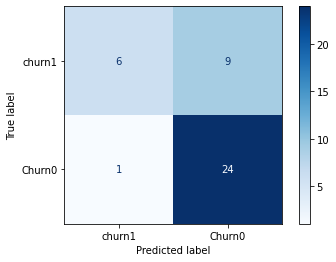

In [91]:
# Making the confusion matrix 
# [1, 0] to split labels
cm = confusion_matrix(y_test, yhat, labels = [1, 0])

# Setting the labels in the samen order as below
cmd = ConfusionMatrixDisplay(cm, display_labels = ['churn1','Churn0'])

# Plotting using blues as color scale
cmd.plot(cmap = 'Blues')
plt.show()

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0.

In [97]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



**F1 score:** Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

# Log loss
Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [98]:
log_loss(y_test, yhat_prob)

0.6017092478101185